In [1]:
# import libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
df = pd.read_csv("/Users/maxwellpearse/Library/Mobile Documents/com~apple~CloudDocs/Life/b.Business, Money, Education,  Employment/Python/data_jobs.csv")

# cleaning data
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
df = df[df["job_title_short"] == "Data Analyst"]


In [3]:
df_exploded = df.explode("job_skills")

skill_stats = df_exploded.groupby("job_skills").agg(
    skill_count = ("job_skills", "count"), 
    median_salary = ("salary_year_avg", "median")
)

skill_count = 20
skill_stats = skill_stats.sort_values("skill_count", ascending=False).head(skill_count)


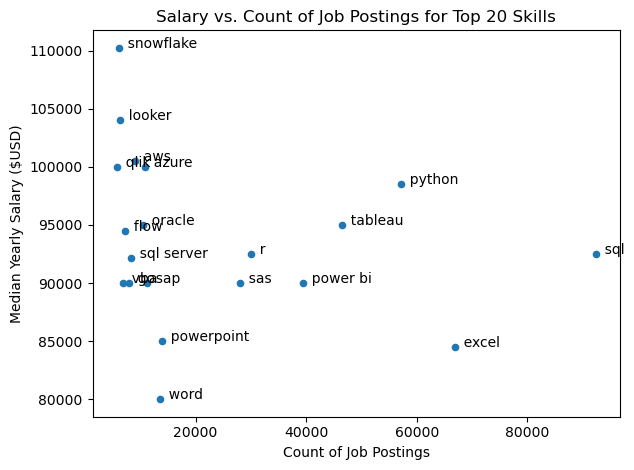

In [4]:
skill_stats.plot(kind="scatter", x="skill_count", y="median_salary")
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary ($USD)")
plt.title(f"Salary vs. Count of Job Postings for Top {skill_count} Skills")
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats["skill_count"].iloc[i], skill_stats["median_salary"].iloc[i], f"  {txt}")

plt.show()

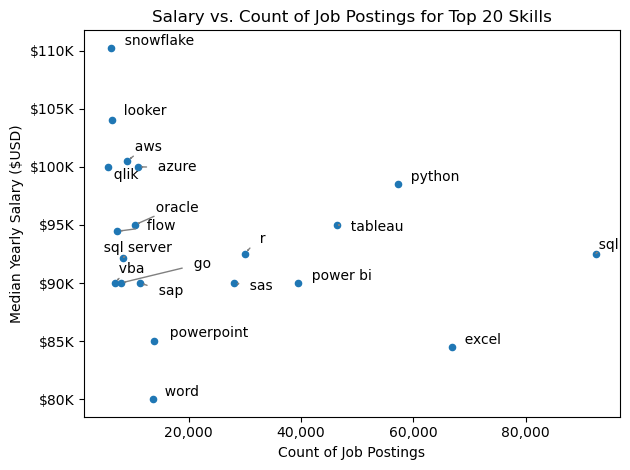

In [7]:
from adjustText import adjust_text
import matplotlib.ticker as ticker

texts = []
skill_stats.plot(kind="scatter", x="skill_count", y="median_salary")

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats["skill_count"].iloc[i], skill_stats["median_salary"].iloc[i], f"  {txt}"))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=1)) #crux of the whole thing not overlapping

ax = plt.gca() #fig, ax = plt.subplots() # now have access to the axis or ax = plt.gca() get current axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K")) # pos is index value of each of tick marks( need to call it)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:,.0f}"))

plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary ($USD)")
plt.title(f"Salary vs. Count of Job Postings for Top {skill_count} Skills")
plt.tight_layout()
plt.show()